# In this project, I'll use a basic ANN with keras to model a housing price regression problem

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [19]:
sns.reset_orig()

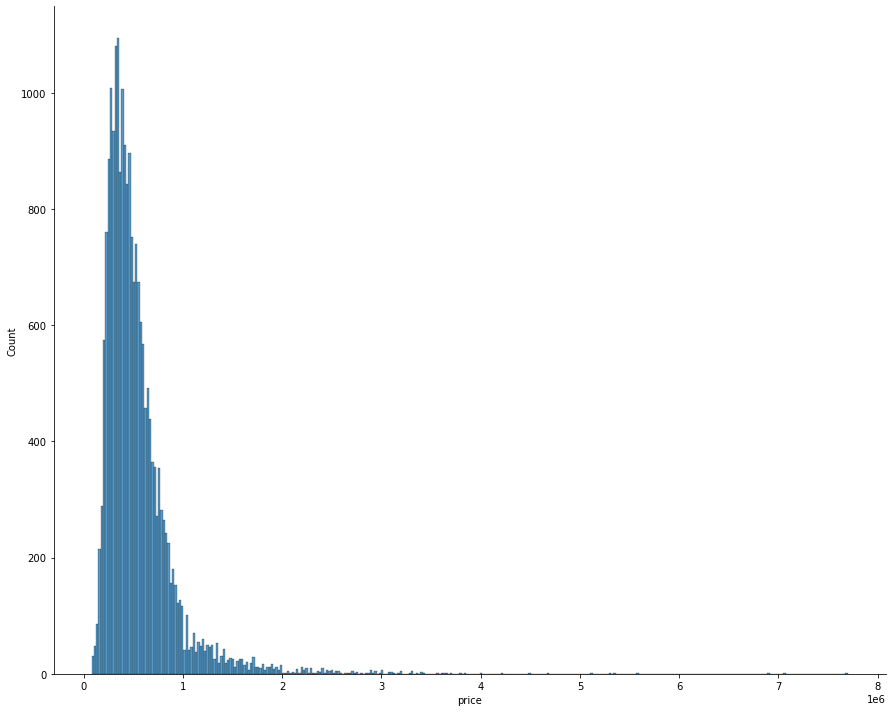

In [29]:
sns.displot(data=df, x='price',height=10,aspect=1.25)

Most houses fall between the mean of about 1/2 million to 1.5 million

It does look like we have some extreme outliers which much affect our models

In [31]:
df.sort_values('price', ascending=False)[:30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [34]:
len(df[df['price'] > 3000000])

45

In [35]:
len(df)

21597

we will remove samples with prices above 3m.

In [36]:
index = df[df['price'] > 3000000].index

In [37]:
fe_df = df.drop(index, axis=0)

In [38]:
len(fe_df)

21552

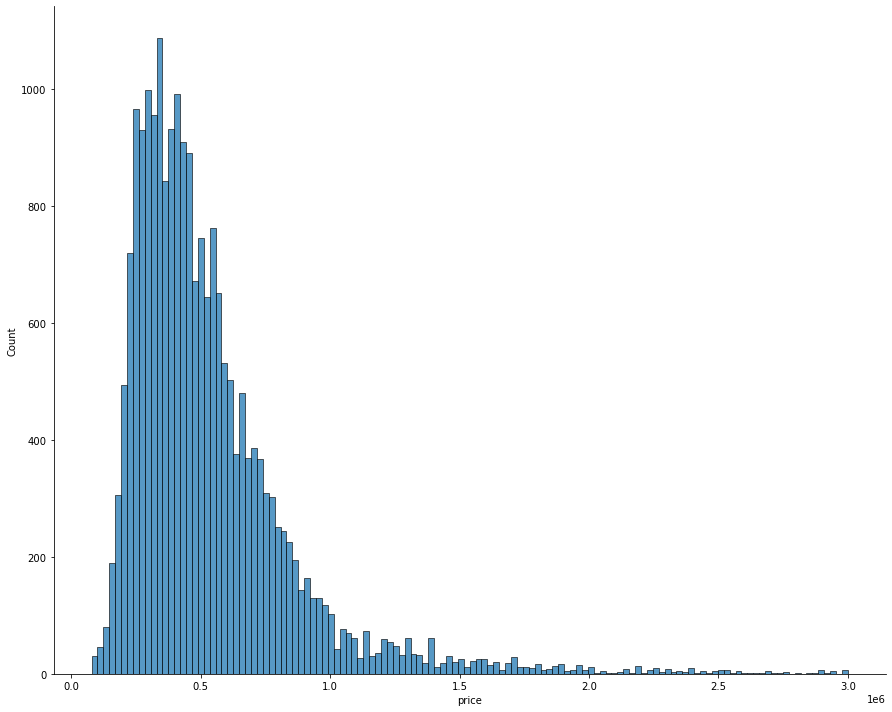

In [44]:
sns.displot(data=fe_df, x='price',height=10,aspect=1.25)

In [46]:
fe_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [47]:
fe_df = fe_df.drop('id', axis=1)

In [48]:
fe_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [51]:
fe_df['date'] = pd.to_datetime(fe_df['date'])

In [52]:
fe_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
fe_df['month'] = fe_df['date'].apply(lambda date: date.month)

In [58]:
fe_df['year'] = fe_df['date'].apply(lambda date: date.year)

In [59]:
fe_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='month', ylabel='price'>

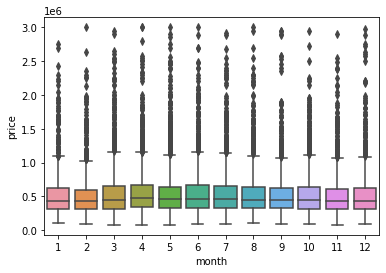

In [60]:
sns.boxplot(data=fe_df, x='month', y='price')

<AxesSubplot:xlabel='year', ylabel='price'>

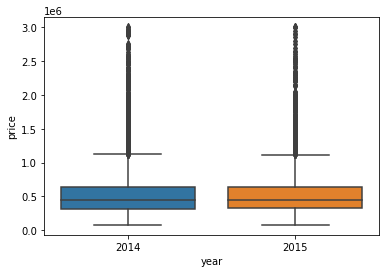

In [61]:
sns.boxplot(data=fe_df, x='year', y='price')

<AxesSubplot:xlabel='month'>

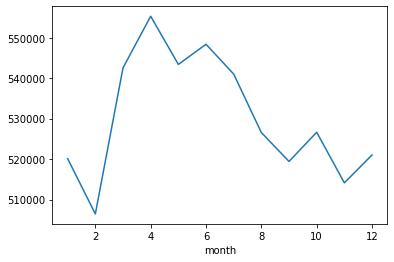

In [67]:
fe_df.groupby('month').mean()['price'].plot()

Looks like Spring - Summer is the best time to sell houses

<AxesSubplot:xlabel='year'>

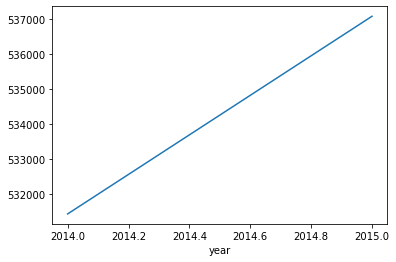

In [68]:
fe_df.groupby('year').mean()['price'].plot()

grouping the average price by year accounts for inflation

<AxesSubplot:xlabel='long', ylabel='lat'>

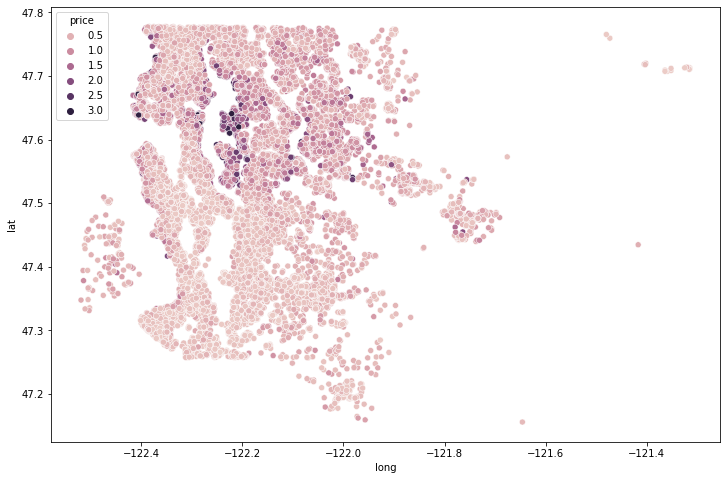

In [70]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=fe_df,hue='price')

<AxesSubplot:xlabel='long', ylabel='lat'>

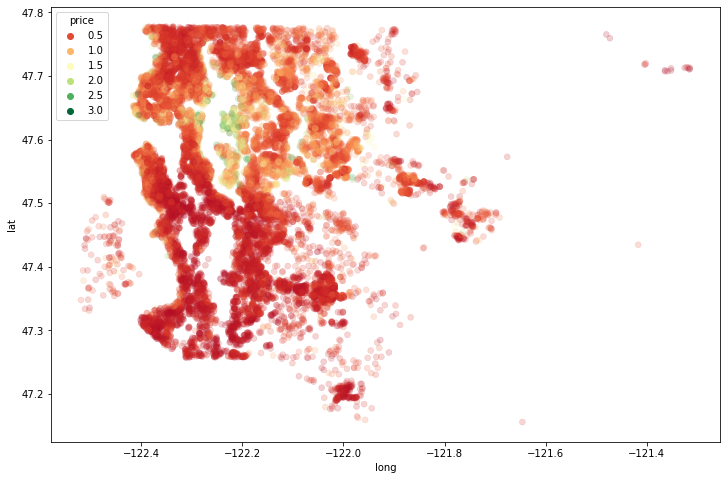

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=fe_df,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

In [73]:
fe_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [74]:
fe_df = fe_df.drop('zipcode', axis=1)

In [75]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [76]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In both these cases, we can leave the data as it is since there is some implied incremental relationship between what year the house was renovated or size of the basement and the value of the house.

In [78]:
fe_df = fe_df.drop('date', axis=1)

In [79]:
fe_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


Let's prepare our data for training

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = fe_df.drop('price', axis=1)
y = fe_df['price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
scaler.fit(X_train)

MinMaxScaler()

In [86]:
scaled_X_train = scaler.transform(X_train)

In [87]:
scaled_X_test = scaler.transform(X_test)

Begin training the model

In [88]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8231001068431689357
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2252026676
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7125195617904995555
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [90]:
scaled_X_train.shape

(17241, 19)

In [91]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [94]:
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [96]:
model.fit(scaled_X_train, y_train.values, 
          validation_data=(scaled_X_test, y_test),
          batch_size=128, epochs=1000,
          callbacks=[stop])

Epoch 1/1000
135/135 [==============================] - 2s 6ms/step - loss: 396114067456.0000 - val_loss: 381350543360.0000
Epoch 2/1000
135/135 [==============================] - 1s 5ms/step - loss: 389998051328.0000 - val_loss: 360661745664.0000
Epoch 3/1000
135/135 [==============================] - 1s 5ms/step - loss: 316580888576.0000 - val_loss: 214015295488.0000
Epoch 4/1000
135/135 [==============================] - 1s 5ms/step - loss: 132882071552.0000 - val_loss: 73531072512.0000
Epoch 5/1000
135/135 [==============================] - 1s 5ms/step - loss: 77831667712.0000 - val_loss: 70035505152.0000
Epoch 6/1000
135/135 [==============================] - 1s 5ms/step - loss: 75573460992.0000 - val_loss: 68145967104.0000
Epoch 7/1000
135/135 [==============================] - 1s 5ms/step - loss: 73459564544.0000 - val_loss: 66218897408.0000
Epoch 8/1000
135/135 [==============================] - 1s 5ms/step - loss: 71241940992.0000 - val_loss: 63967948800.0000
Epoch 9/1000
135/

135/135 [==============================] - 1s 6ms/step - loss: 26577022976.0000 - val_loss: 27106123776.0000
Epoch 134/1000
135/135 [==============================] - 1s 6ms/step - loss: 26589769728.0000 - val_loss: 27077249024.0000
Epoch 135/1000
135/135 [==============================] - 1s 7ms/step - loss: 26546647040.0000 - val_loss: 27104346112.0000
Epoch 136/1000
135/135 [==============================] - 1s 5ms/step - loss: 26538928128.0000 - val_loss: 27062761472.0000
Epoch 137/1000
135/135 [==============================] - 1s 5ms/step - loss: 26497808384.0000 - val_loss: 27048286208.0000
Epoch 138/1000
135/135 [==============================] - 1s 5ms/step - loss: 26522976256.0000 - val_loss: 27169628160.0000
Epoch 139/1000
135/135 [==============================] - 1s 5ms/step - loss: 26476304384.0000 - val_loss: 27023857664.0000
Epoch 140/1000
135/135 [==============================] - 1s 5ms/step - loss: 26462650368.0000 - val_loss: 27176165376.0000
Epoch 141/1000
135/135 

135/135 [==============================] - 2s 17ms/step - loss: 25742897152.0000 - val_loss: 26591547392.0000
Epoch 200/1000
135/135 [==============================] - 2s 18ms/step - loss: 25754890240.0000 - val_loss: 26561945600.0000
Epoch 201/1000
135/135 [==============================] - 2s 18ms/step - loss: 25755002880.0000 - val_loss: 26643019776.0000
Epoch 202/1000
135/135 [==============================] - 3s 20ms/step - loss: 25714808832.0000 - val_loss: 26693269504.0000
Epoch 203/1000
135/135 [==============================] - 1s 11ms/step - loss: 25728311296.0000 - val_loss: 26579435520.0000
Epoch 204/1000
135/135 [==============================] - 1s 10ms/step - loss: 25710602240.0000 - val_loss: 26534912000.0000
Epoch 205/1000
135/135 [==============================] - 1s 9ms/step - loss: 25718261760.0000 - val_loss: 26584537088.0000
Epoch 206/1000
135/135 [==============================] - 1s 8ms/step - loss: 25688840192.0000 - val_loss: 26556602368.0000
Epoch 207/1000
13

Epoch 330/1000
135/135 [==============================] - 1s 5ms/step - loss: 24316450816.0000 - val_loss: 25857785856.0000
Epoch 331/1000
135/135 [==============================] - ETA: 0s - loss: 24551684096.000 - 1s 5ms/step - loss: 24292659200.0000 - val_loss: 25828663296.0000
Epoch 332/1000
135/135 [==============================] - 1s 5ms/step - loss: 24302348288.0000 - val_loss: 25827078144.0000
Epoch 333/1000
135/135 [==============================] - 1s 5ms/step - loss: 24280881152.0000 - val_loss: 25924495360.0000
Epoch 334/1000
135/135 [==============================] - 1s 5ms/step - loss: 24293822464.0000 - val_loss: 25827184640.0000
Epoch 335/1000
135/135 [==============================] - 1s 5ms/step - loss: 24279689216.0000 - val_loss: 25983275008.0000
Epoch 336/1000
135/135 [==============================] - ETA: 0s - loss: 24309342208.000 - 1s 5ms/step - loss: 24239937536.0000 - val_loss: 25863034880.0000
Epoch 337/1000
135/135 [==============================] - 1s 5ms

135/135 [==============================] - 1s 5ms/step - loss: 23469795328.0000 - val_loss: 25192992768.0000
Epoch 462/1000
135/135 [==============================] - 1s 5ms/step - loss: 23417843712.0000 - val_loss: 25100120064.0000
Epoch 463/1000
135/135 [==============================] - 1s 5ms/step - loss: 23413084160.0000 - val_loss: 25127733248.0000
Epoch 464/1000
135/135 [==============================] - 1s 5ms/step - loss: 23413680128.0000 - val_loss: 25135259648.0000
Epoch 465/1000
135/135 [==============================] - 1s 5ms/step - loss: 23425337344.0000 - val_loss: 25124548608.0000
Epoch 466/1000
135/135 [==============================] - 1s 5ms/step - loss: 23419523072.0000 - val_loss: 25087004672.0000
Epoch 467/1000
135/135 [==============================] - 1s 5ms/step - loss: 23407218688.0000 - val_loss: 25101015040.0000
Epoch 468/1000
135/135 [==============================] - 1s 5ms/step - loss: 23430907904.0000 - val_loss: 25237325824.0000
Epoch 469/1000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 22850197504.0000 - val_loss: 24508647424.0000
Epoch 594/1000
135/135 [==============================] - 1s 5ms/step - loss: 22781980672.0000 - val_loss: 24649750528.0000
Epoch 595/1000
135/135 [==============================] - 1s 5ms/step - loss: 22818021376.0000 - val_loss: 24530378752.0000
Epoch 596/1000
135/135 [==============================] - 1s 5ms/step - loss: 22798036992.0000 - val_loss: 24453365760.0000
Epoch 597/1000
135/135 [==============================] - 1s 5ms/step - loss: 22878728192.0000 - val_loss: 24616443904.0000
Epoch 598/1000
135/135 [==============================] - 1s 5ms/step - loss: 22798557184.0000 - val_loss: 24510640128.0000
Epoch 599/1000
135/135 [==============================] - 1s 6ms/step - loss: 22839797760.0000 - val_loss: 24604807168.0000
Epoch 600/1000
135/135 [==============================] - 1s 5ms/step - loss: 22805506048.0000 - val_loss: 24476362752.0000
Epoch 601/1000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 22234587136.0000 - val_loss: 23914127360.0000
Epoch 726/1000
135/135 [==============================] - 1s 5ms/step - loss: 22216704000.0000 - val_loss: 23977744384.0000
Epoch 727/1000
135/135 [==============================] - 1s 5ms/step - loss: 22232567808.0000 - val_loss: 23955423232.0000
Epoch 728/1000
135/135 [==============================] - 1s 5ms/step - loss: 22252929024.0000 - val_loss: 24003532800.0000
Epoch 729/1000
135/135 [==============================] - 1s 5ms/step - loss: 22246076416.0000 - val_loss: 24093417472.0000
Epoch 730/1000
135/135 [==============================] - 1s 5ms/step - loss: 22190489600.0000 - val_loss: 23927224320.0000
Epoch 731/1000
135/135 [==============================] - 1s 5ms/step - loss: 22201112576.0000 - val_loss: 24001247232.0000
Epoch 732/1000
135/135 [==============================] - 1s 5ms/step - loss: 22255603712.0000 - val_loss: 24001761280.0000
Epoch 733/1000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 21860624384.0000 - val_loss: 23477331968.0000
Epoch 858/1000
135/135 [==============================] - 1s 5ms/step - loss: 21878411264.0000 - val_loss: 23454099456.0000
Epoch 859/1000
135/135 [==============================] - 1s 5ms/step - loss: 21868851200.0000 - val_loss: 23509809152.0000
Epoch 860/1000
135/135 [==============================] - 1s 5ms/step - loss: 21842712576.0000 - val_loss: 23448197120.0000
Epoch 861/1000
135/135 [==============================] - 1s 5ms/step - loss: 21851373568.0000 - val_loss: 23384178688.0000
Epoch 862/1000
135/135 [==============================] - 1s 5ms/step - loss: 21798952960.0000 - val_loss: 23507298304.0000
Epoch 863/1000
135/135 [==============================] - 1s 5ms/step - loss: 21824845824.0000 - val_loss: 23403401216.0000
Epoch 864/1000
135/135 [==============================] - 1s 5ms/step - loss: 21834473472.0000 - val_loss: 23464708096.0000
Epoch 865/1000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 20983437312.0000 - val_loss: 22518884352.0000
Epoch 990/1000
135/135 [==============================] - 1s 5ms/step - loss: 20962627584.0000 - val_loss: 22542047232.0000
Epoch 991/1000
135/135 [==============================] - 1s 5ms/step - loss: 20948840448.0000 - val_loss: 22490888192.0000
Epoch 992/1000
135/135 [==============================] - 1s 5ms/step - loss: 20894107648.0000 - val_loss: 22543904768.0000
Epoch 993/1000
135/135 [==============================] - 1s 5ms/step - loss: 20881661952.0000 - val_loss: 22505787392.0000
Epoch 994/1000
135/135 [==============================] - 1s 5ms/step - loss: 20867715072.0000 - val_loss: 22432706560.0000
Epoch 995/1000
135/135 [==============================] - 1s 5ms/step - loss: 20844652544.0000 - val_loss: 22395979776.0000
Epoch 996/1000
135/135 [==============================] - 1s 5ms/step - loss: 20807987200.0000 - val_loss: 22383108096.0000
Epoch 997/1000
135/135 

In [98]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

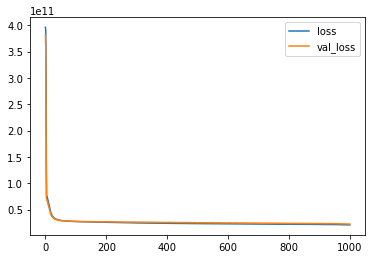

In [100]:
loss.plot()

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [102]:
preds = model.predict(scaled_X_test)

In [103]:
mean_absolute_error(y_test, preds)

93313.88738655475

In [104]:
np.sqrt(mean_squared_error(y_test, preds))

149503.63224670314

In [106]:
from tensorflow.keras.layers import Dropout

In [107]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [108]:
model.fit(scaled_X_train, y_train.values, 
          validation_data=(scaled_X_test, y_test),
          batch_size=128, epochs=5000,
          callbacks=[stop])

Epoch 1/5000
135/135 [==============================] - 1s 6ms/step - loss: 396171575296.0000 - val_loss: 381711646720.0000
Epoch 2/5000
135/135 [==============================] - 1s 5ms/step - loss: 395721900032.0000 - val_loss: 380417769472.0000
Epoch 3/5000
135/135 [==============================] - 1s 5ms/step - loss: 391861829632.0000 - val_loss: 372768800768.0000
Epoch 4/5000
135/135 [==============================] - 1s 5ms/step - loss: 377059311616.0000 - val_loss: 349432741888.0000
Epoch 5/5000
135/135 [==============================] - 1s 5ms/step - loss: 341858385920.0000 - val_loss: 301971767296.0000
Epoch 6/5000
135/135 [==============================] - 1s 5ms/step - loss: 281285525504.0000 - val_loss: 231243169792.0000
Epoch 7/5000
135/135 [==============================] - 1s 5ms/step - loss: 206720712704.0000 - val_loss: 155665629184.0000
Epoch 8/5000
135/135 [==============================] - 1s 4ms/step - loss: 139016175616.0000 - val_loss: 101358256128.0000
Epoch 9/

135/135 [==============================] - 1s 5ms/step - loss: 42373287936.0000 - val_loss: 30415013888.0000
Epoch 134/5000
135/135 [==============================] - 1s 5ms/step - loss: 41425166336.0000 - val_loss: 30183333888.0000
Epoch 135/5000
135/135 [==============================] - 1s 5ms/step - loss: 41102446592.0000 - val_loss: 30600450048.0000
Epoch 136/5000
135/135 [==============================] - 1s 5ms/step - loss: 42547286016.0000 - val_loss: 30120794112.0000
Epoch 137/5000
135/135 [==============================] - 1s 5ms/step - loss: 41610559488.0000 - val_loss: 30062004224.0000
Epoch 138/5000
135/135 [==============================] - 1s 5ms/step - loss: 41011068928.0000 - val_loss: 30068895744.0000
Epoch 139/5000
135/135 [==============================] - 1s 5ms/step - loss: 41461526528.0000 - val_loss: 29920131072.0000
Epoch 140/5000
135/135 [==============================] - 1s 5ms/step - loss: 40673021952.0000 - val_loss: 30088030208.0000
Epoch 141/5000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 37433229312.0000 - val_loss: 28017074176.0000
Epoch 266/5000
135/135 [==============================] - 1s 5ms/step - loss: 38301433856.0000 - val_loss: 28214712320.0000
Epoch 267/5000
135/135 [==============================] - 1s 5ms/step - loss: 38022074368.0000 - val_loss: 28155398144.0000
Epoch 268/5000
135/135 [==============================] - 1s 5ms/step - loss: 38513500160.0000 - val_loss: 28041684992.0000
Epoch 269/5000
135/135 [==============================] - 1s 5ms/step - loss: 38687293440.0000 - val_loss: 27926239232.0000
Epoch 270/5000
135/135 [==============================] - 1s 5ms/step - loss: 38227595264.0000 - val_loss: 28051826688.0000
Epoch 271/5000
135/135 [==============================] - 1s 5ms/step - loss: 37258301440.0000 - val_loss: 28041007104.0000
Epoch 272/5000
135/135 [==============================] - 1s 5ms/step - loss: 38133460992.0000 - val_loss: 27901995008.0000
Epoch 273/5000
135/135 

In [109]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

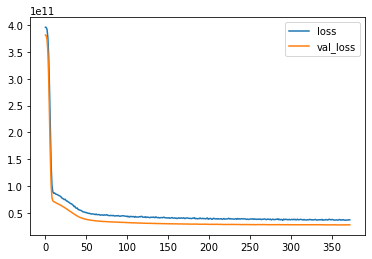

In [110]:
loss.plot()

In [123]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [124]:
model.fit(scaled_X_train, y_train.values, 
          validation_data=(scaled_X_test, y_test.values),
          batch_size=128, epochs=2000,
          callbacks=[stop])

Epoch 1/2000
135/135 [==============================] - 1s 5ms/step - loss: 396174360576.0000 - val_loss: 381710172160.0000
Epoch 2/2000
135/135 [==============================] - 1s 5ms/step - loss: 395265835008.0000 - val_loss: 378594164736.0000
Epoch 3/2000
135/135 [==============================] - 1s 4ms/step - loss: 382821826560.0000 - val_loss: 350635753472.0000
Epoch 4/2000
135/135 [==============================] - 1s 4ms/step - loss: 322875097088.0000 - val_loss: 253730930688.0000
Epoch 5/2000
135/135 [==============================] - 1s 5ms/step - loss: 193625112576.0000 - val_loss: 116227547136.0000
Epoch 6/2000
135/135 [==============================] - 1s 5ms/step - loss: 93943685120.0000 - val_loss: 72255045632.0000
Epoch 7/2000
135/135 [==============================] - 1s 5ms/step - loss: 77801447424.0000 - val_loss: 70341640192.0000
Epoch 8/2000
135/135 [==============================] - 1s 4ms/step - loss: 76351102976.0000 - val_loss: 69248778240.0000
Epoch 9/2000
1

135/135 [==============================] - 1s 5ms/step - loss: 27646269440.0000 - val_loss: 27934214144.0000
Epoch 134/2000
135/135 [==============================] - 1s 5ms/step - loss: 27624888320.0000 - val_loss: 27828733952.0000
Epoch 135/2000
135/135 [==============================] - 1s 5ms/step - loss: 27615567872.0000 - val_loss: 27832424448.0000
Epoch 136/2000
135/135 [==============================] - 1s 5ms/step - loss: 27581792256.0000 - val_loss: 27809732608.0000
Epoch 137/2000
135/135 [==============================] - 1s 5ms/step - loss: 27571423232.0000 - val_loss: 27766056960.0000
Epoch 138/2000
135/135 [==============================] - 1s 6ms/step - loss: 27545647104.0000 - val_loss: 27810877440.0000
Epoch 139/2000
135/135 [==============================] - 1s 5ms/step - loss: 27528216576.0000 - val_loss: 27751405568.0000
Epoch 140/2000
135/135 [==============================] - 1s 5ms/step - loss: 27485132800.0000 - val_loss: 27843604480.0000
Epoch 141/2000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 26246422528.0000 - val_loss: 26971480064.0000
Epoch 266/2000
135/135 [==============================] - 1s 4ms/step - loss: 26260219904.0000 - val_loss: 26935724032.0000
Epoch 267/2000
135/135 [==============================] - 1s 4ms/step - loss: 26255169536.0000 - val_loss: 26975789056.0000
Epoch 268/2000
135/135 [==============================] - 1s 5ms/step - loss: 26248417280.0000 - val_loss: 26979061760.0000
Epoch 269/2000
135/135 [==============================] - 1s 5ms/step - loss: 26223880192.0000 - val_loss: 27068887040.0000
Epoch 270/2000
135/135 [==============================] - 1s 4ms/step - loss: 26207315968.0000 - val_loss: 26946273280.0000
Epoch 271/2000
135/135 [==============================] - 1s 5ms/step - loss: 26233907200.0000 - val_loss: 27011805184.0000
Epoch 272/2000
135/135 [==============================] - 1s 4ms/step - loss: 26206373888.0000 - val_loss: 26913605632.0000
Epoch 273/2000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 25417005056.0000 - val_loss: 26551271424.0000
Epoch 398/2000
135/135 [==============================] - 1s 5ms/step - loss: 25412876288.0000 - val_loss: 26579247104.0000
Epoch 399/2000
135/135 [==============================] - 1s 5ms/step - loss: 25392855040.0000 - val_loss: 26531426304.0000
Epoch 400/2000
135/135 [==============================] - 1s 5ms/step - loss: 25408348160.0000 - val_loss: 26522955776.0000
Epoch 401/2000
135/135 [==============================] - 1s 5ms/step - loss: 25393766400.0000 - val_loss: 26511843328.0000
Epoch 402/2000
135/135 [==============================] - 1s 5ms/step - loss: 25390942208.0000 - val_loss: 26493282304.0000
Epoch 403/2000
135/135 [==============================] - 1s 5ms/step - loss: 25368756224.0000 - val_loss: 26613678080.0000
Epoch 404/2000
135/135 [==============================] - 1s 5ms/step - loss: 25354397696.0000 - val_loss: 26491891712.0000
Epoch 405/2000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 24593727488.0000 - val_loss: 26109931520.0000
Epoch 530/2000
135/135 [==============================] - 1s 5ms/step - loss: 24580335616.0000 - val_loss: 26087696384.0000
Epoch 531/2000
135/135 [==============================] - 1s 4ms/step - loss: 24575264768.0000 - val_loss: 26094761984.0000
Epoch 532/2000
135/135 [==============================] - 1s 5ms/step - loss: 24599627776.0000 - val_loss: 26112344064.0000
Epoch 533/2000
135/135 [==============================] - 1s 5ms/step - loss: 24569853952.0000 - val_loss: 26072553472.0000
Epoch 534/2000
135/135 [==============================] - 1s 4ms/step - loss: 24579889152.0000 - val_loss: 26030663680.0000
Epoch 535/2000
135/135 [==============================] - 1s 5ms/step - loss: 24586106880.0000 - val_loss: 26088124416.0000
Epoch 536/2000
135/135 [==============================] - 1s 4ms/step - loss: 24531589120.0000 - val_loss: 26052460544.0000
Epoch 537/2000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 23887409152.0000 - val_loss: 25735770112.0000
Epoch 662/2000
135/135 [==============================] - 1s 5ms/step - loss: 23900094464.0000 - val_loss: 25656438784.0000
Epoch 663/2000
135/135 [==============================] - 1s 5ms/step - loss: 23870889984.0000 - val_loss: 25690009600.0000
Epoch 664/2000
135/135 [==============================] - 1s 6ms/step - loss: 23893184512.0000 - val_loss: 25714106368.0000
Epoch 665/2000
135/135 [==============================] - 1s 5ms/step - loss: 23879186432.0000 - val_loss: 25702264832.0000
Epoch 666/2000
135/135 [==============================] - 1s 5ms/step - loss: 23867004928.0000 - val_loss: 25695184896.0000
Epoch 667/2000
135/135 [==============================] - 1s 5ms/step - loss: 23853027328.0000 - val_loss: 25749159936.0000
Epoch 668/2000
135/135 [==============================] - 1s 5ms/step - loss: 23863910400.0000 - val_loss: 25636712448.0000
Epoch 669/2000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 23487537152.0000 - val_loss: 25392957440.0000
Epoch 794/2000
135/135 [==============================] - 1s 5ms/step - loss: 23473143808.0000 - val_loss: 25467267072.0000
Epoch 795/2000
135/135 [==============================] - 1s 5ms/step - loss: 23457083392.0000 - val_loss: 25407426560.0000
Epoch 796/2000
135/135 [==============================] - 1s 5ms/step - loss: 23471740928.0000 - val_loss: 25430964224.0000
Epoch 797/2000
135/135 [==============================] - 1s 5ms/step - loss: 23467118592.0000 - val_loss: 25390137344.0000
Epoch 798/2000
135/135 [==============================] - 1s 5ms/step - loss: 23458963456.0000 - val_loss: 25383092224.0000
Epoch 799/2000
135/135 [==============================] - 1s 5ms/step - loss: 23455993856.0000 - val_loss: 25394905088.0000
Epoch 800/2000
135/135 [==============================] - 1s 5ms/step - loss: 23465555968.0000 - val_loss: 25365954560.0000
Epoch 801/2000
135/135 

135/135 [==============================] - 1s 5ms/step - loss: 23192086528.0000 - val_loss: 25393305600.0000
Epoch 926/2000
135/135 [==============================] - 1s 5ms/step - loss: 23158298624.0000 - val_loss: 25216526336.0000
Epoch 927/2000
135/135 [==============================] - 1s 6ms/step - loss: 23150751744.0000 - val_loss: 25235580928.0000
Epoch 928/2000
135/135 [==============================] - 1s 5ms/step - loss: 23143299072.0000 - val_loss: 25214662656.0000
Epoch 929/2000
135/135 [==============================] - 1s 6ms/step - loss: 23158564864.0000 - val_loss: 25300586496.0000
Epoch 930/2000
135/135 [==============================] - 1s 6ms/step - loss: 23159926784.0000 - val_loss: 25130498048.0000
Epoch 931/2000
135/135 [==============================] - 1s 5ms/step - loss: 23152390144.0000 - val_loss: 25155262464.0000
Epoch 932/2000
135/135 [==============================] - 1s 5ms/step - loss: 23135705088.0000 - val_loss: 25178054656.0000
Epoch 933/2000
135/135 

Epoch 1057/2000
135/135 [==============================] - 1s 5ms/step - loss: 22867472384.0000 - val_loss: 24909467648.0000
Epoch 1058/2000
135/135 [==============================] - 1s 5ms/step - loss: 22868144128.0000 - val_loss: 24865126400.0000
Epoch 1059/2000
135/135 [==============================] - 1s 5ms/step - loss: 22856062976.0000 - val_loss: 24911276032.0000
Epoch 1060/2000
135/135 [==============================] - 1s 5ms/step - loss: 22910279680.0000 - val_loss: 24879812608.0000
Epoch 1061/2000
135/135 [==============================] - 1s 5ms/step - loss: 22865475584.0000 - val_loss: 24955691008.0000
Epoch 1062/2000
135/135 [==============================] - 1s 5ms/step - loss: 22870566912.0000 - val_loss: 24912805888.0000
Epoch 1063/2000
135/135 [==============================] - 1s 5ms/step - loss: 22848591872.0000 - val_loss: 24925538304.0000
Epoch 1064/2000
135/135 [==============================] - 1s 5ms/step - loss: 22874988544.0000 - val_loss: 24903563264.0000


In [125]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

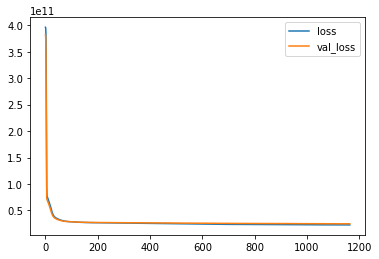

In [126]:
loss.plot()

In [128]:
loss

,loss,val_loss
0,3.961744e+11,3.817102e+11
1,3.952658e+11,3.785942e+11
2,3.828218e+11,3.506358e+11
3,3.228751e+11,2.537309e+11
4,1.936251e+11,1.162275e+11
...,...,...
1159,2.269244e+10,2.478834e+10
1160,2.271232e+10,2.491493e+10
1161,2.270297e+10,2.478263e+10
1162,2.271224e+10,2.477645e+10


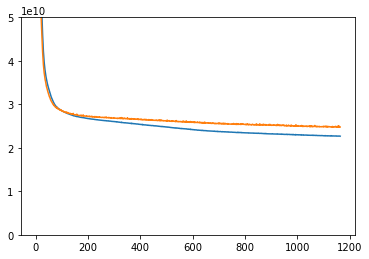

In [134]:
plt.ylim(0,5*10**10)
plt.plot(loss.index, loss['loss'])
plt.plot(loss.index, loss['val_loss'])

In [136]:
preds = model.predict(scaled_X_test)

In [137]:
mean_absolute_error(y_test, preds)

99521.06007886802

In [138]:
np.sqrt(mean_squared_error(y_test, preds))

157402.0148315971

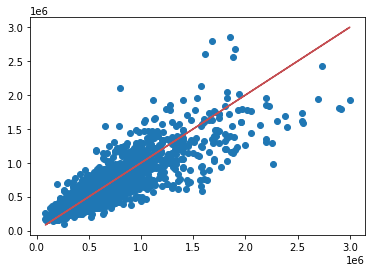

In [139]:
# Our predictions
plt.scatter(y_test,preds)

# Perfect predictions
plt.plot(y_test,y_test,'r')